In [3]:
# Data generation code adapted from https://m2lines.github.io/L96_demo/notebooks/L96-two-scale-description.html
import matplotlib.pyplot as plt
import numpy as np

from L96_model import L96_2t_xdot_ydot, integrate_L96_2t

In [4]:
def s(k, K):
    """A non-dimension coordinate from -1..+1 corresponding to k=0..K"""
    return 2 * (0.5 + k) / K - 1

# Generate data

In [5]:
K = 40  # Number of globa-scale variables X
J = 5  # Number of local-scale Y variables per single global-scale X variable
nt = 1000  # Number of time steps
si = 0.005  # Sampling time interval
dt = 0.005  # Time step
F = 8.0  # Forcing
h = 1.0  # Coupling coefficient
b = 10.0  # ratio of amplitudes
c = 10.0  # time-scale ratio

In [6]:
k = np.arange(K)  # For coordinate in plots
j = np.arange(J * K)  # For coordinate in plots

# Initial conditions
X_init = s(k, K) * (s(k, K) - 1) * (s(k, K) + 1)
Y_init = 0 * s(j, J * K) * (s(j, J * K) - 1) * (s(j, J * K) + 1)

# "Run" model
X, Y, t = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt=dt)

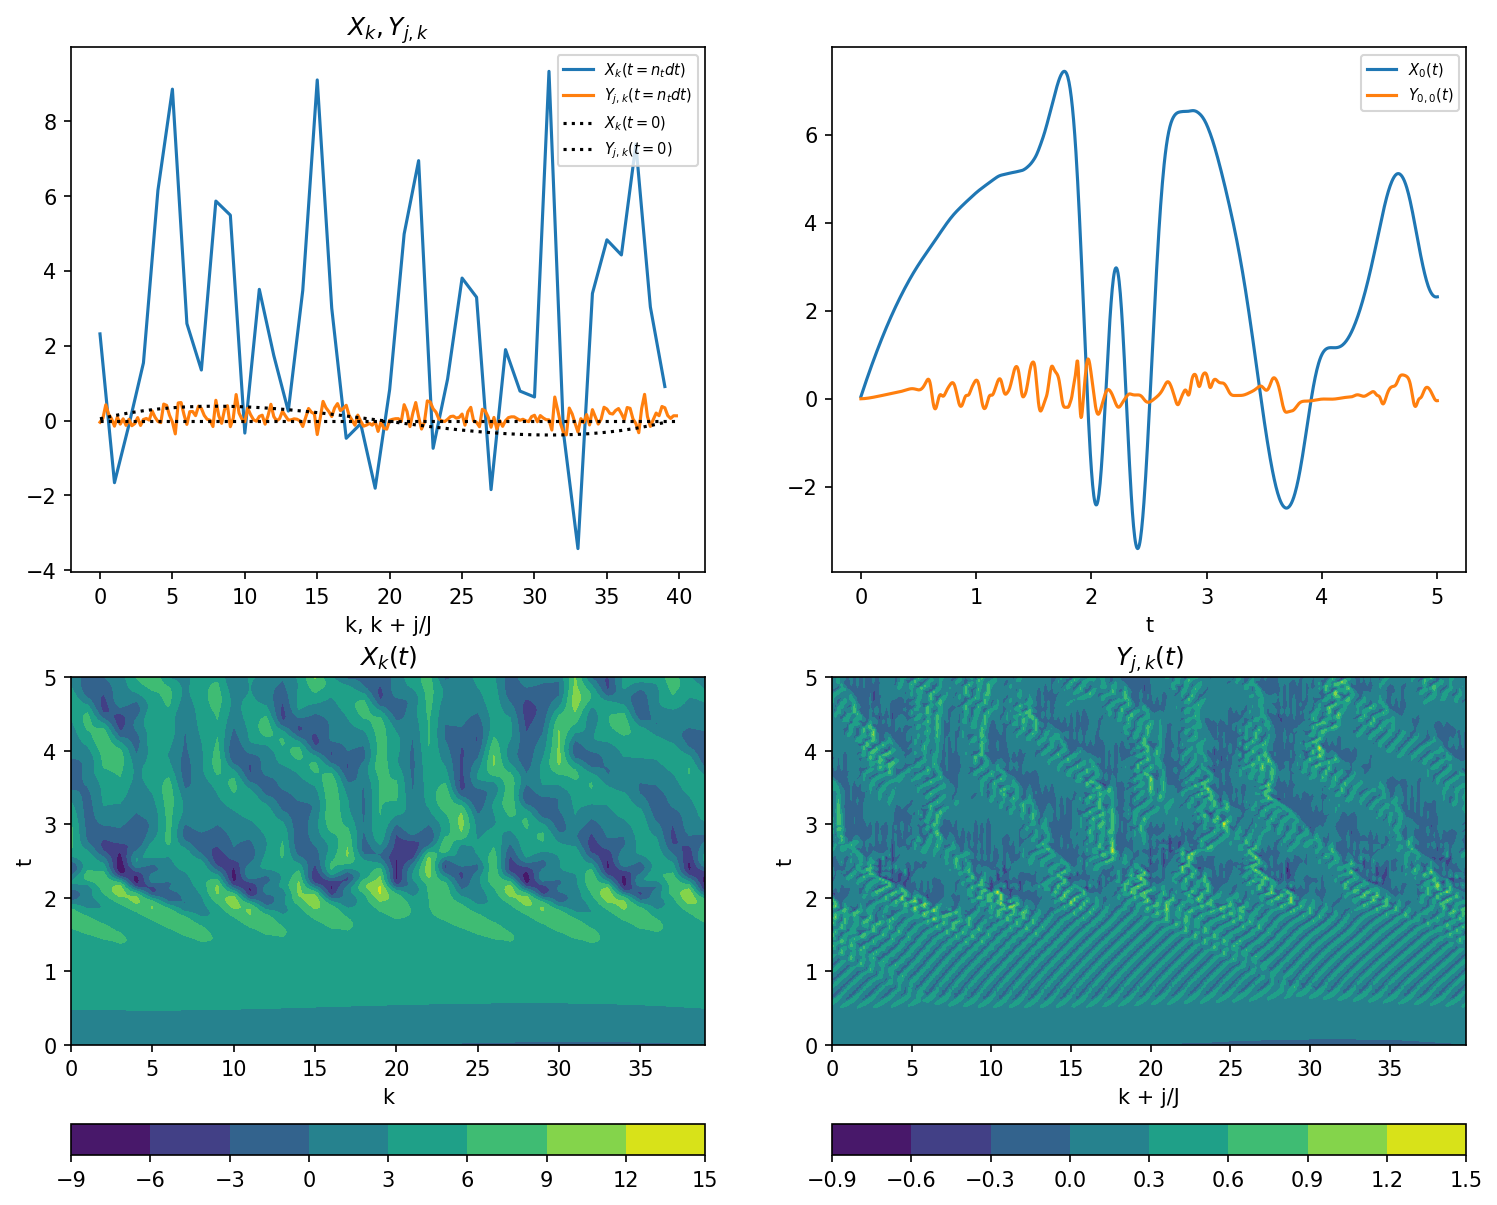

In [7]:
plt.figure(figsize=(12, 10), dpi=150)
plt.subplot(221)

# Snapshot of X[k]
plt.plot(k, X[-1], label="$X_k(t=n_t dt)$")
plt.plot(j / J, Y[-1], label="$Y_{j,k}(t=n_t dt)$")
plt.plot(k, X_init, "k:", label="$X_k(t=0)$")
plt.plot(j / J, Y_init, "k:", label="$Y_{j,k}(t=0)$")
plt.legend(fontsize=7)
plt.xlabel("k, k + j/J")
plt.title("$X_k, Y_{j,k}$")
plt.subplot(222)

# Sample time-series X[0](t), Y[0](t)
plt.plot(t, X[:, 0], label="$X_0(t)$")
plt.plot(t, Y[:, 0], label="$Y_{0,0}(t)$")
plt.legend(fontsize=7)
plt.xlabel("t")
plt.subplot(223)

# Full model history of X
plt.contourf(k, t, X)
plt.colorbar(orientation="horizontal")
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$")
plt.subplot(224)

# Full model history of Y
plt.contourf(j / J, t, Y)
plt.colorbar(orientation="horizontal")
plt.xlabel("k + j/J")
plt.ylabel("t")
plt.title("$Y_{j,k}(t)$");

# Add noise

In [8]:
noise_scale = 2.0

X_noisy = X + np.random.normal(scale=noise_scale, size=X.shape)

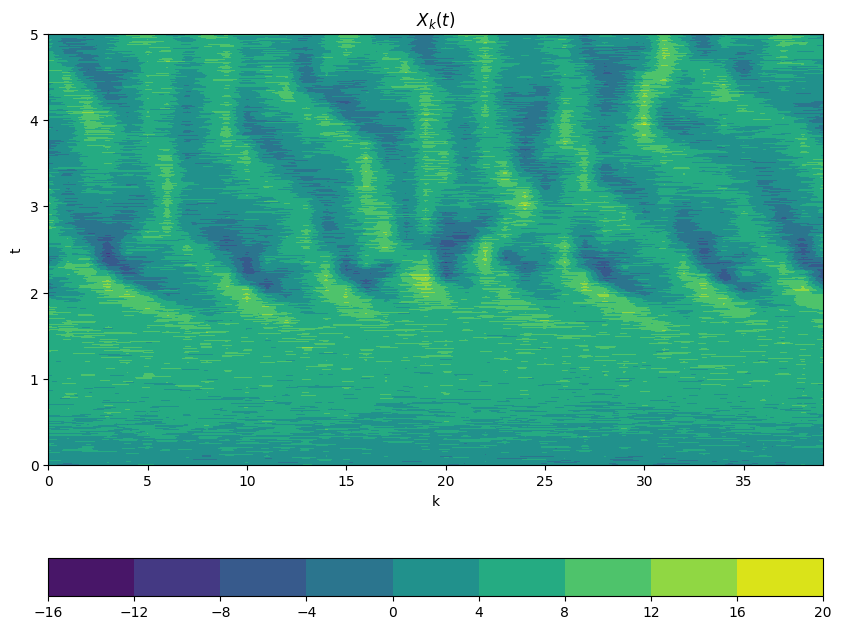

In [9]:
# Full model history of noisy X
plt.figure(figsize=(10,8))
plt.contourf(k, t, X_noisy)
plt.colorbar(orientation="horizontal")
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$")
plt.show()

In [10]:
X.shape

(1001, 40)